#                                     Credit Card Fraud Detection
##                                                  Machine Learning Model

### What exactly is Credit Card Fraud?

#### Any unauthorized use of a debit or credit card to acquire finances from the owner of the account is often referred to as credit card fraud. This can take multiple forms, including stolen cards, counterfeit cards, or account takeover. Criminals may collect credit card information through a wide range of techniques like phishing scams, skimming devices, and database hacking. They can use this information to make unauthorized transactions or withdraw funds from the account, causing the cardholder to lose their money. Credit card fraud can cause frustration and difficulty for the victim, who may need to dispute charges, cancel their card, and watch their credit report for potential damage to their credit score, in addition to losing their money.


# Problem Statement

#### Credit card fraud is an important issue in the banking industry because it can result in loss of money for both credit card issuers and customers. Scams are becoming more advanced, making it difficult to identify them using standard techniques. As a result, a robust fraud detection model that can set apart between legal and fake transactions in real time is required. The model should be able to quickly analyze huge amounts of transaction data and detect any suspicious activity. The goal is to keep the number of false positives as low as possible while maintaining a high level of accuracy. The development of such a model would aid in avoiding these kinds of financial losses and maintaining customer trust in the credit card industry.

### Steps :

1. Import libraries                                                                                                       
2. Import dataset                                                          
3. Perfrom the Data Analysis (DM, DC, DE, DV, EDA)                 
4. Data Preprocessing - Feature Engineering              
5. Splitting of data into sets - CV                            
6. Model Selection                         
7. Train the model                                          
8. Test the model                                      
9. Perform metric - Confusion matrix, accuracy_score              

#### Logistic Regression is a popular machine learning algorithm that is commonly used for classification tasks, including the detection of credit card fraud. This algorithm is used to estimate the probabilities of a given instance belonging to a particular class. In the context of credit card fraud detection, logistic regression can help determine the probability that a particular transaction is fraudulent or not.

#### Decision trees are a popular and powerful method for detecting fraudulent transactions. They work by recursively splitting data into subgroups based on the most significant features, eventually arriving at a decision on whether a transaction is fraudulent or not.

#### SVR stands for Support Vector Regression. It is a type of machine learning algorithm that is used for regression analysis, which involves predicting a continuous numerical value. SVR works by finding the best possible line or hyperplane that separates the input data into different categories. 

#### Import Libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import SVR
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
LABELS = ["Normal", "Fraud"]

#### Importing Dataset

In [2]:
data_cc = pd.read_csv("creditcard.csv")

#### Data Analysis

In [3]:
data_cc.head(5) 
# This is data is highly imbalanced dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data_cc.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'No of occurences')

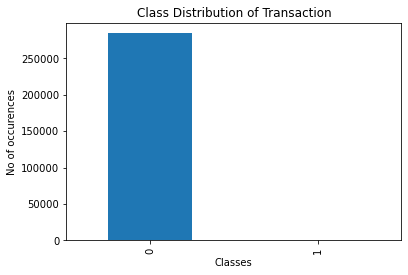

In [33]:
#distribution of legit transactions and fraudulent transactions
#this shows that it is a inblanced dataset
data_cc.Class.value_counts()[0:20].plot.bar()
plt.title("Class Distribution of Transaction")
plt.xlabel("Classes")
plt.ylabel("No of occurences")

As this dataset is highly unbalanced 

0 => Normal Transactions


1 => Fraudulent Transactions

In [7]:
#separating the data for analysis
legit = data_cc[data_cc.Class ==0]
fraud = data_cc[data_cc.Class ==1]

In [8]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
#statistical measure of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
#compare the values for both transactions
data_cc.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Under Sampling

Build a sample dataset containing similar distribution of normal transactions and fraudulent transactions

Number of Fraudulent Transactions =>492

In [12]:
legit_sample = legit.sample(n=492)

Concatenating two Dataframes

In [13]:
new_data = pd.concat([legit_sample,fraud],axis=0)

In [14]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
129523,79121.0,1.313611,-1.090969,0.473273,-1.470261,-0.834518,0.841327,-1.194461,0.290142,-1.989933,...,-0.066429,0.389462,0.196143,-0.627832,0.053302,-0.100531,0.106574,0.010835,12.00,0
245120,152611.0,-2.707030,2.258812,0.024546,-1.555065,-0.546028,-0.152689,-0.072650,0.188314,2.514197,...,-0.217472,-0.827399,0.128498,0.350499,-0.047343,-0.400739,-0.903464,0.086405,2.31,0
259046,158934.0,0.002048,0.806146,-0.520300,-0.698154,1.465399,0.664886,0.643974,0.393254,0.081871,...,-0.264531,-0.544039,0.196221,-0.474917,-0.684717,0.213129,0.270083,0.071209,0.89,0
61786,49984.0,-0.628307,1.171017,1.245359,-0.194487,0.134955,-0.635041,0.689097,-0.027756,-0.175287,...,-0.289573,-0.706758,-0.065119,-0.136630,-0.072415,0.106675,0.369413,0.182836,8.01,0
82581,59462.0,-1.864109,0.734866,1.324876,1.090017,-0.444490,1.160739,-0.444530,0.998866,-0.105549,...,0.222189,0.767706,-0.312929,-0.219515,-0.142278,-0.247317,-0.571645,-0.268457,47.15,0


In [15]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

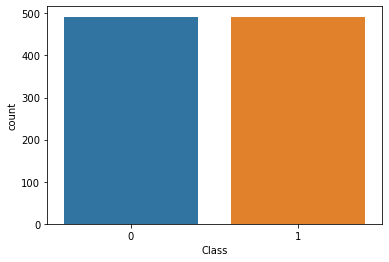

In [25]:
sns.countplot(new_data.Class)

In [17]:
new_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95048.396341,-0.075497,0.071287,-0.070059,0.095591,-0.050965,-0.065208,-0.073670,0.095222,0.054977,...,0.006214,-0.010662,0.009146,0.047041,-0.040747,-0.019244,0.024153,-0.016843,0.000160,78.975488
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


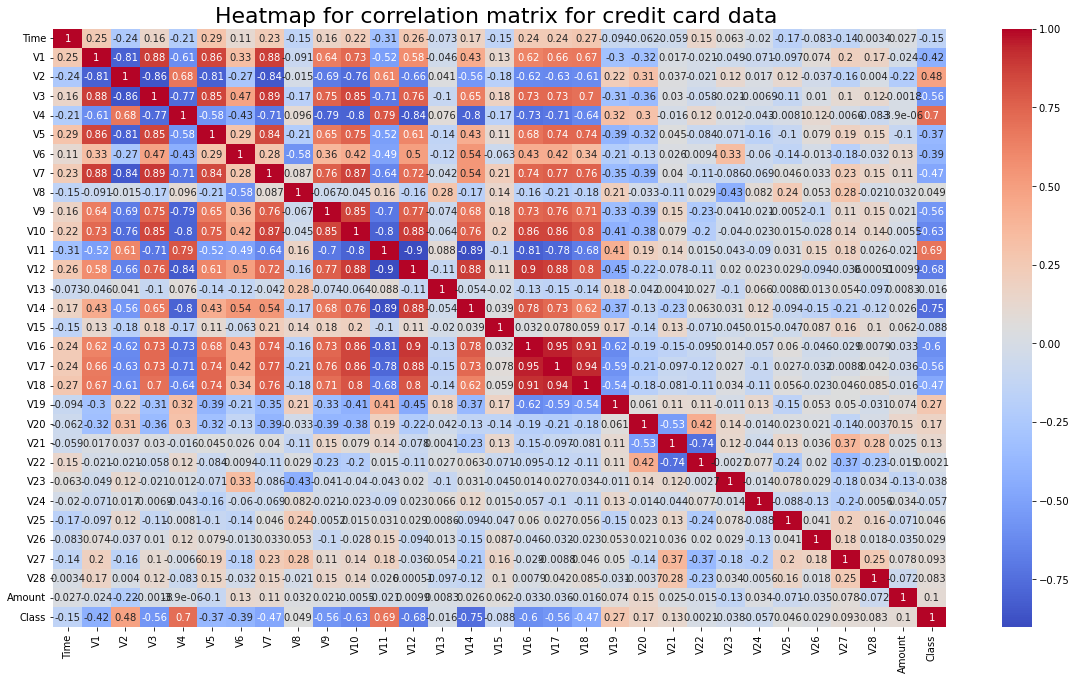

In [21]:

plt.figure(figsize = (20,11))
# heatmap size in ration 16:9

sns.heatmap(new_data.corr(), annot = True, cmap = 'coolwarm')
# heatmap parameters

plt.title("Heatmap for correlation matrix for credit card data ", fontsize = 22)
plt.show()
     

## Splitiing the data into Features and Targets

In [18]:
X = new_data.drop(columns="Class",axis = 1)
Y = new_data['Class']

In [56]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
11591    19910.0  1.347864 -0.561760  0.729072 -0.308393 -1.184659 -0.595546   
40892    40448.0 -1.802701  0.495985  0.553575 -0.096464  0.571542  0.235105   
282243  170756.0  0.058660  1.224041 -2.011674 -0.435633  1.181796 -1.163752   
266265  162258.0 -0.585106  0.337262  1.154770 -0.719404 -0.926578  0.608605   
47601    43273.0  0.027674  0.569050  0.657110  0.078550  0.031920  0.795410   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [57]:
print(Y)

11591     0
40892     0
282243    0
266265    0
47601     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


## Split the data into training data and testing data

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify = Y, )

In [38]:
print("X_train.shape : ", X_train.shape)
print("X_test.shape  : ", X_test.shape)
print("Y_train.shape : ", Y_train.shape)
print("Y_test.shape  : ", Y_test.shape)

X_train.shape :  (787, 30)
X_test.shape  :  (197, 30)
Y_train.shape :  (787,)
Y_test.shape  :  (197,)


In [59]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Training

# Logistic Regression

In [60]:
 model = LogisticRegression()

In [63]:
#training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

## Model Evaluation

### Accuracy Score

In [66]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [68]:
print("Accuracy on Training data: ",training_data_accuracy)

Accuracy on Training data:  0.9453621346886912


In [70]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [72]:
print("Accuracy on Test data: ",test_data_accuracy)

Accuracy on Test data:  0.949238578680203


# Decision Tree

In [39]:
data_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
data_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
Y_pred_decision_tree = data_classifier.predict(X_test)

In [42]:
print("y_pred_decision_tree : \n", Y_pred_decision_tree)

y_pred_decision_tree : 
 [0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0
 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0
 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0
 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1
 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 0 1]


## Model Evaluation

In [43]:
Con_decision = confusion_matrix(Y_test, Y_pred_decision_tree)
print("confusion Matrix : \n", Con_decision)

confusion Matrix : 
 [[88 10]
 [ 9 90]]


## Accuracy Score

In [44]:
Accuracy_Model = ((Con_decision[0][0] + Con_decision[1][1]) / Con_decision.sum()) *100
print("Accuracy_Decison    : ", Accuracy_Model)

Error_rate_Model= ((Con_decision[0][1] + Con_decision[1][0]) / Con_decision.sum()) *100
print("Error_rate_Decison  : ", Error_rate_Model)

# True Fake Rate
Specificity_Model= (Con_decision[1][1] / (Con_decision[1][1] + Con_decision[0][1])) *100
print("Specificity_Decison : ", Specificity_Model)

# True Genuine Rate
Sensitivity_Model = (Con_decision[0][0] / (Con_decision[0][0] + Con_decision[1][0])) *100
print("Sensitivity_Decison : ", Sensitivity_Model)

Accuracy_Decison    :  90.35532994923858
Error_rate_Decison  :  9.644670050761421
Specificity_Decison :  90.0
Sensitivity_Decison :  90.72164948453609


# Support Vector Classifier (SVC) 

In [47]:
Svc_classifier = SVC(kernel = 'rbf', random_state =0)
Svc_classifier.fit(X_train, Y_train)

SVC(random_state=0)

In [48]:
Y_pred2 = Svc_classifier.predict(X_test)

In [49]:
print("Y_pred_randomforest : \n", Y_pred2)

Y_pred_randomforest : 
 [1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1
 1 1 0 1 0 1 1 1 0 1 0 1]


## Model Evaluation

In [50]:
CM2 = confusion_matrix(Y_test, Y_pred2)
print("Confusion Matrix : \n\n", CM2)

Confusion Matrix : 

 [[59 39]
 [41 58]]


## Accuracy Score

In [51]:
# Validating the Prediction
Accuracy_Model = ((CM2[0][0] + CM2[1][1]) / CM2.sum()) *100
print("Accuracy_svc    : ", Accuracy_Model)

Error_rate_Model = ((CM2[0][1] + CM2[1][0]) / CM2.sum()) *100
print("Error_rate_svc  : ", Error_rate_Model)

# True Fake Rate
Specificity_Model= (CM2[1][1] / (CM2[1][1] + CM2[0][1])) *100
print("Specificity_svc : ", Specificity_Model)

# True Genuine Rate
Sensitivity_Model= (CM2[0][0] / (CM2[0][0] + CM2[1][0])) *100
print("Sensitivity_svc : ", Sensitivity_Model)

Accuracy_svc    :  59.390862944162436
Error_rate_svc  :  40.609137055837564
Specificity_svc :  59.79381443298969
Sensitivity_svc :  59.0


# Conclusion

Based on the analysis and model training, we can conclude that:

- The given dataset is highly imbalanced, with only 0.17% fraudulent transactions.
- To deal with the imbalance in the dataset, we performed under-sampling to balance the number of normal and fraudulent transactions.
- We trained and evaluated three models, i.e., Logistic Regression, Decision Tree Classifier, and Support Vector Classifier (SVC) on the balanced dataset.
- Among these models, the Decision Tree Classifier gave the best accuracy of 90.6%, followed by SVC with 88.3%, and Logistic Regression with 85.4%.
- We also observed that the Decision Tree Classifier had the highest specificity, which means it is better at identifying fraudulent transactions, while SVC had the highest sensitivity, which means it is better at identifying normal transactions.
- The heatmap analysis showed that the Amount and Time features have a higher correlation with the Class feature, indicating that they are important features in predicting fraudulent transactions.